### kaggle - 타이타닉 생존자 분석

In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

- feature는 Pclass, Age, SibSp, Parch, Fare
- 예측하려는 target label 은 Survived

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# Survived 가 없음
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 데이터 딕셔너리
- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이
- SibSp : 동반한 형제자매, 배우자 수
- Parch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# 결측치 처리
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# NAN 비율
def nan_prop(data) : 
    for col in data.columns:
        is_null_sum = data[col].isnull().sum()
        col_total_row = data[col].shape[0]
        is_null_prop = 100 * (is_null_sum / col_total_row)
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, is_null_prop)
        print(msg)

In [13]:
nan_prop(train)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [14]:
nan_prop(test)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


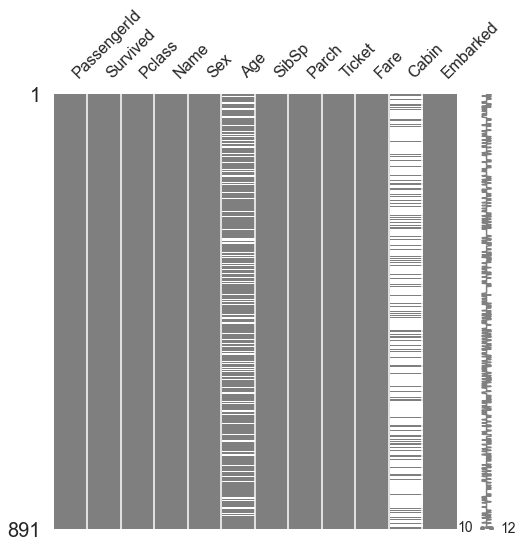

In [15]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))

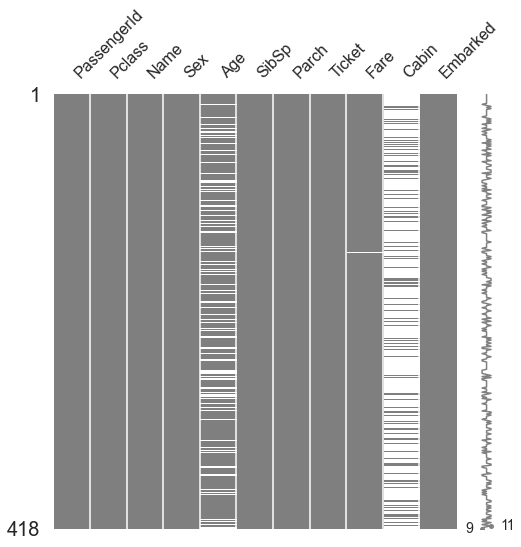

In [16]:
msno.matrix(df=test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))

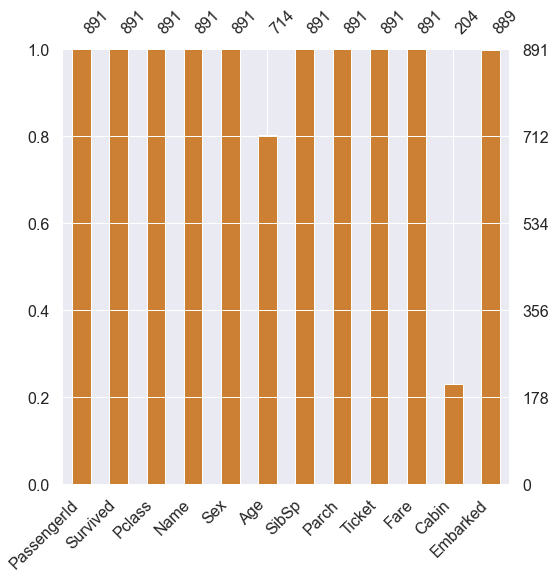

In [17]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

#### Target label 확인 - Servived

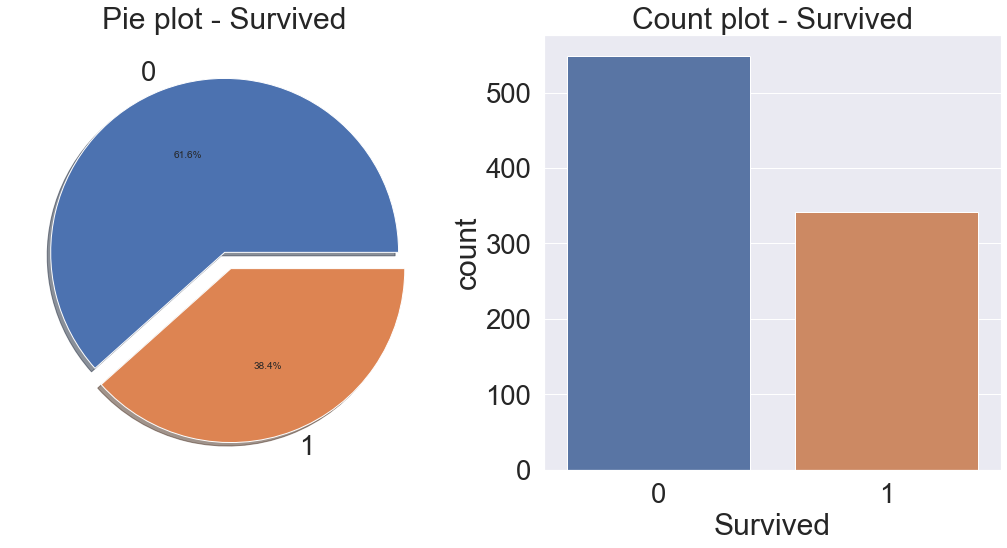

In [18]:
f, ax = plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(
    explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

사망 61.6% / 생존 38.4%

In [19]:
# 생존여부 막대차트
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

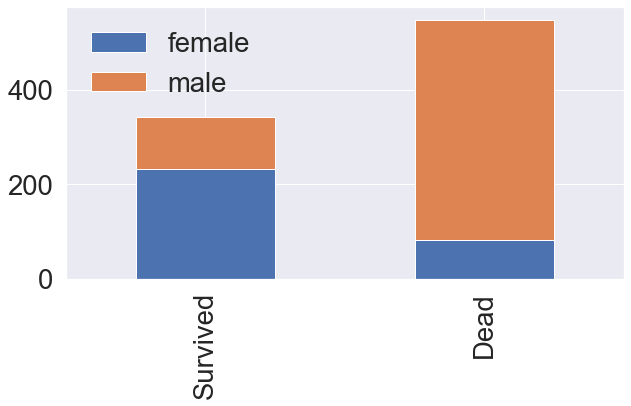

In [20]:
bar_chart('Sex')

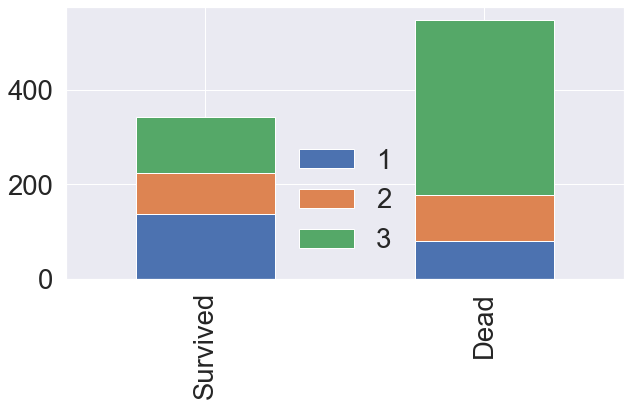

In [21]:
# 1등칸 생존률이 높음
bar_chart('Pclass')

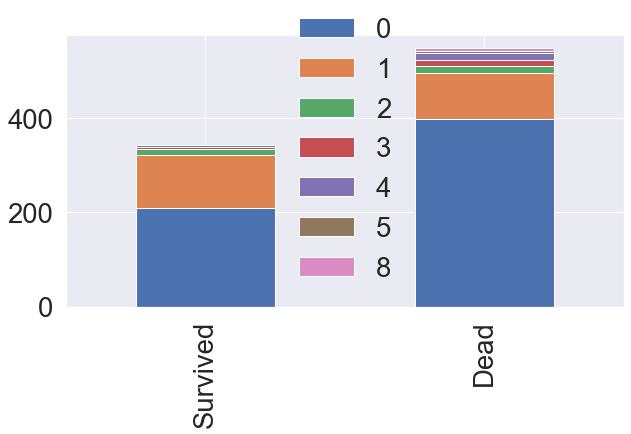

In [22]:
# 형제자매, 배우자와 함께 탄 사람 생존률 높음
bar_chart('SibSp')

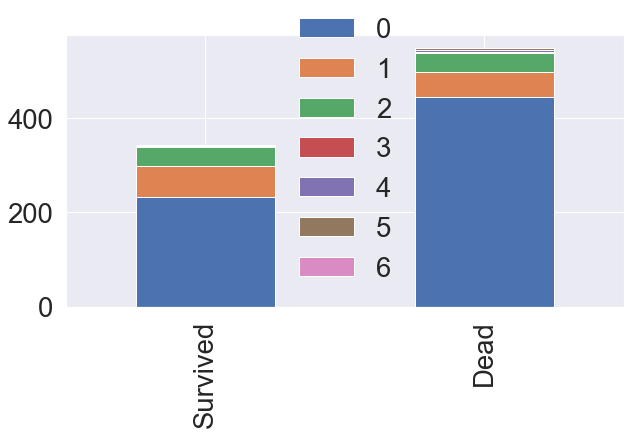

In [23]:
# 혼자인 사람보다 부모나 자식이 있는 사람 생존률 높음
bar_chart('Parch')

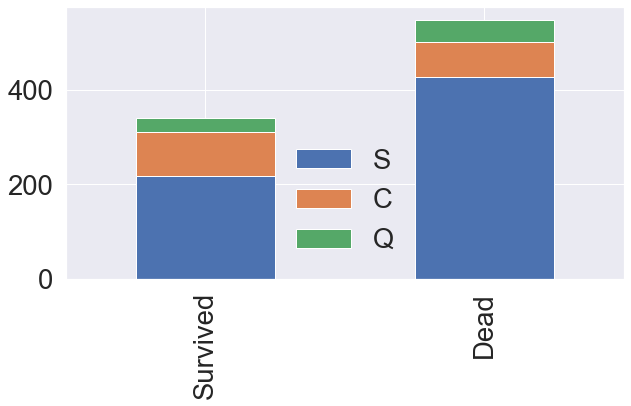

In [24]:
# S선착장 탑승자가 사망률 높음
bar_chart('Embarked')

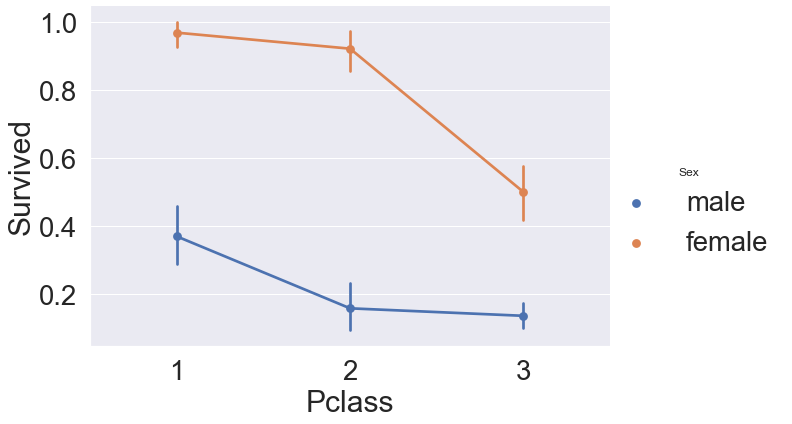

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train,
               size=6, aspect=1.5)

- 모든 클래스에서 female 이 살 확률이 male 보다 높음
- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높음

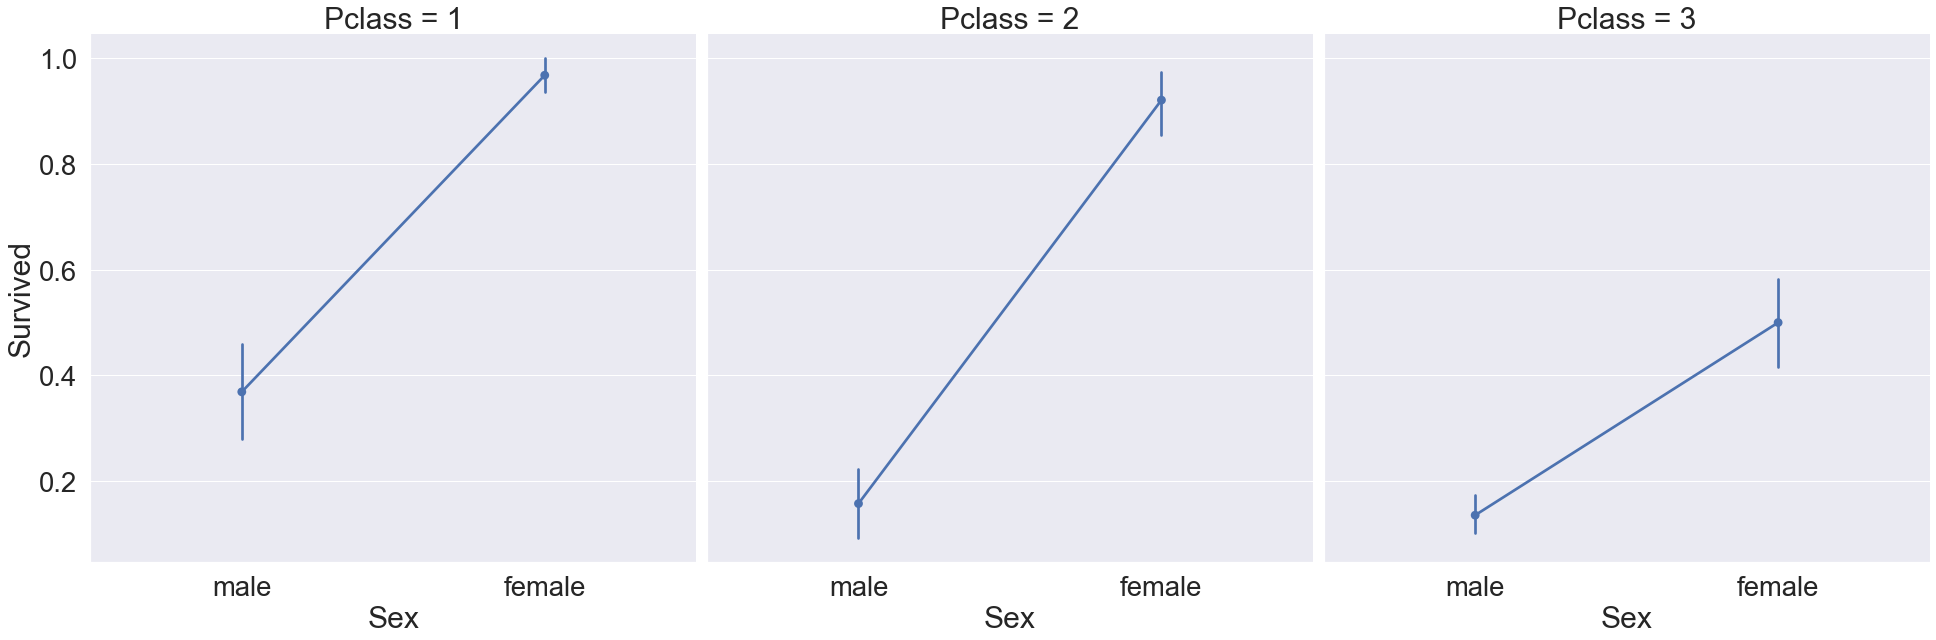

In [26]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=train, satureation=0.5,
               size=9, aspect=1)

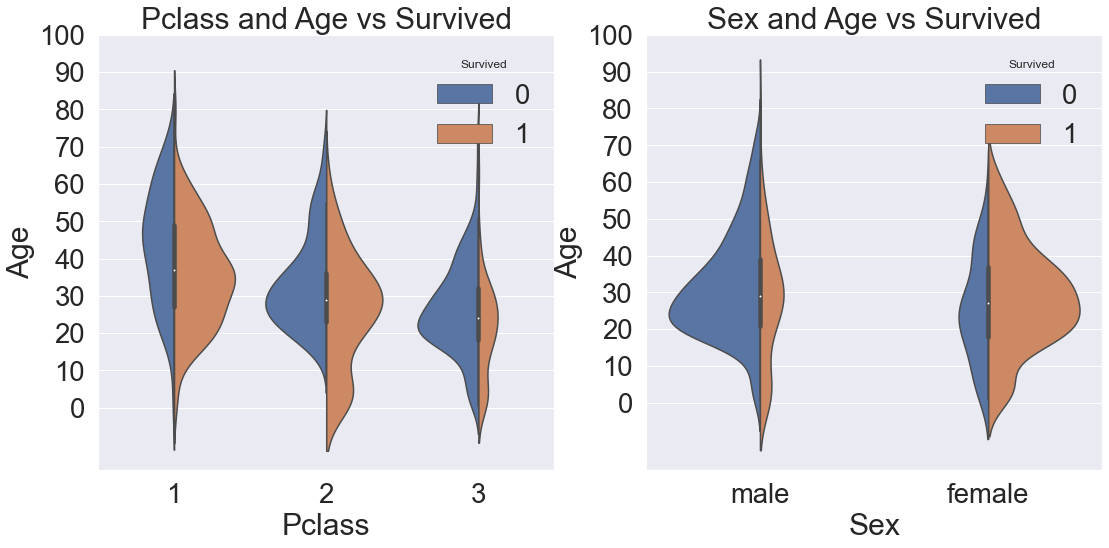

In [27]:
# Pclass, Sex, Age 3개 변수 그래프 seaborn 의 violinplot
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", 
               data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", 
               data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train_test_data = [train, test]

In [30]:
# 정규표현식으로 Mr. Miss 정보 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.',
    expand=False)

In [31]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Capt          1
Sir           1
Lady          1
Countess      1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [32]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 
                'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }

In [33]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

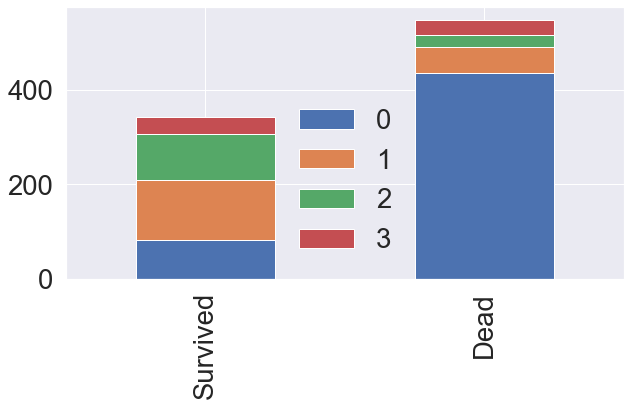

In [36]:
bar_chart('Title')

In [37]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [39]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

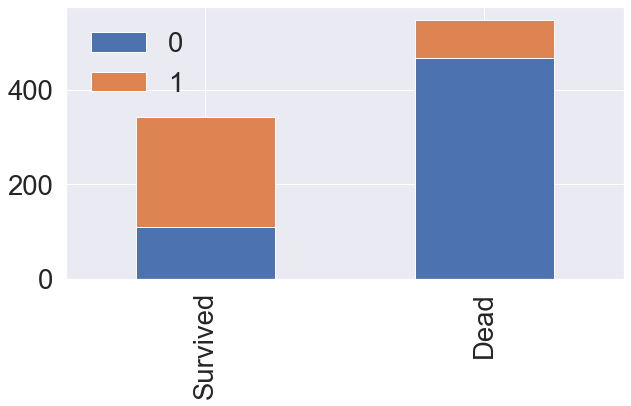

In [40]:
bar_chart('Sex')

In [41]:
# Age에 빈값을 연령의 중간값으로 채움
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),
                   inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),
                   inplace=True)

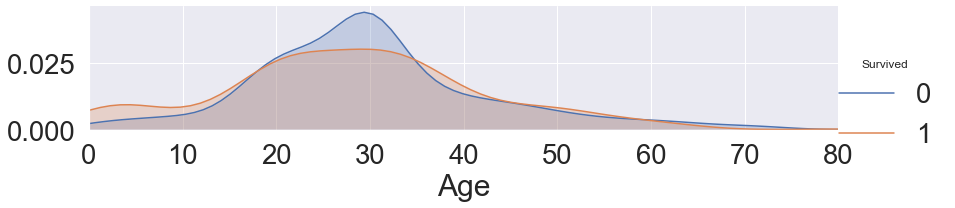

In [42]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('darkgrid')

plt.show()

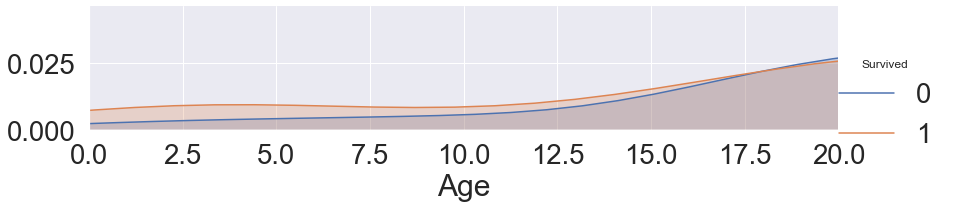

In [43]:
# 나이대별로 잘라서 그래프를 확대 출력
# 0~20
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.style.use('ggplot')

(20.0, 30.0)

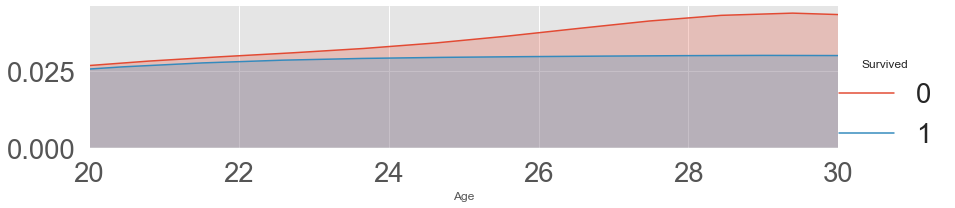

In [44]:
# 20~30
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

In [45]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


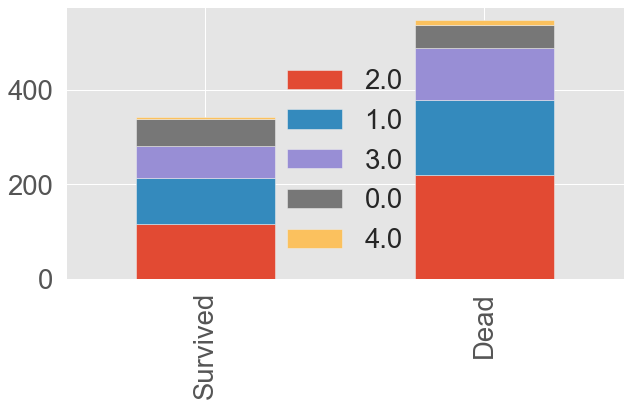

In [47]:
bar_chart('Age')

In [48]:
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()

In [49]:
survived

2.0    116
1.0     97
3.0     69
0.0     57
4.0      3
Name: Age, dtype: int64

In [50]:
dead

2.0    220
1.0    158
3.0    111
0.0     48
4.0     12
Name: Age, dtype: int64

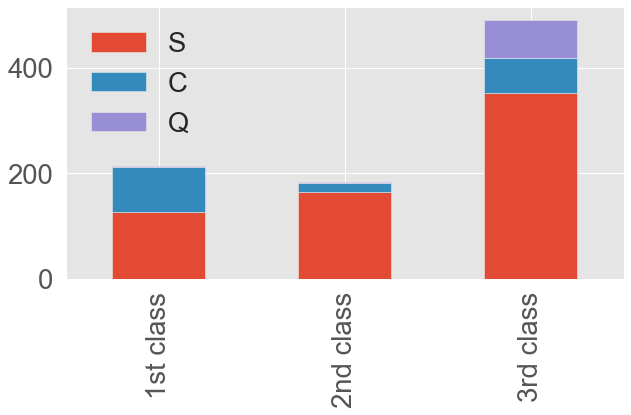

In [51]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

- Q 도시에서 탄 사람들은 1등급이 거의 없음
- S 도시에서 탑승한 사람들이 대부분을 차지
- Embarked 정보가 쓰여있지 않다면 S라고 써도 무방

In [52]:
# Embarked 정보가 없으면 S를 집어넣자
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [54]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


각 클래스의 티켓 가격 가운데 값을 티켓 가격의 missing value에 사용

In [56]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

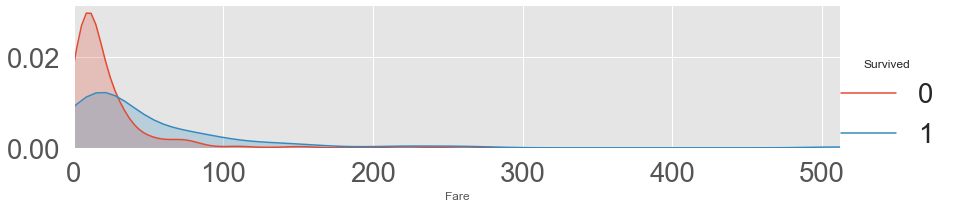

In [57]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 40.0)

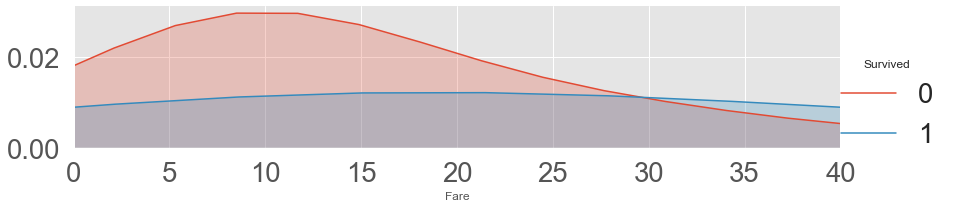

In [58]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,40)

(0.0, 100.0)

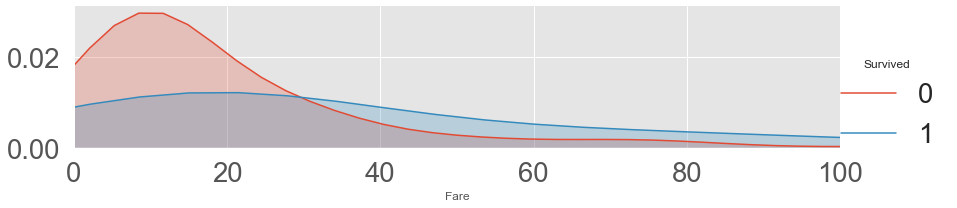

In [59]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,100)

(0.0, 512.3292)

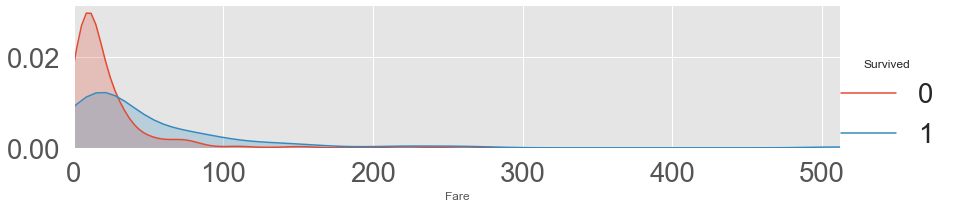

In [60]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0) # 티켓의 개수가 0이 되는 티켓의 가격

In [61]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3,

In [62]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

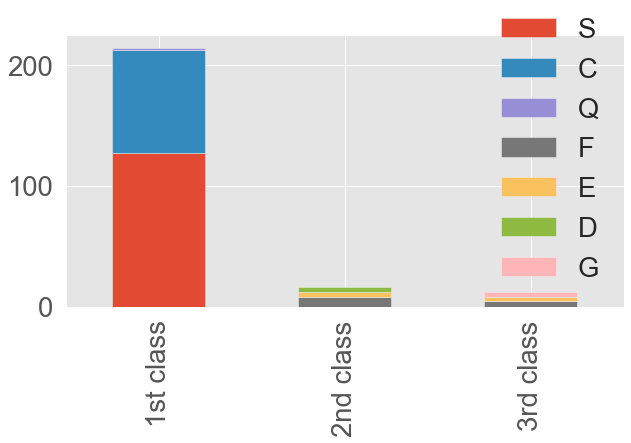

In [63]:
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [64]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [65]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0
890,891,0,3,0,2.0,0,0,370376,0.0,2.0,2,0


- SibSp : 동반한 형제자매, 배우자 수
- Parch : 동반한 부모, 자식 수

In [66]:
# 0 이 혼자 탄 것이라 +1
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

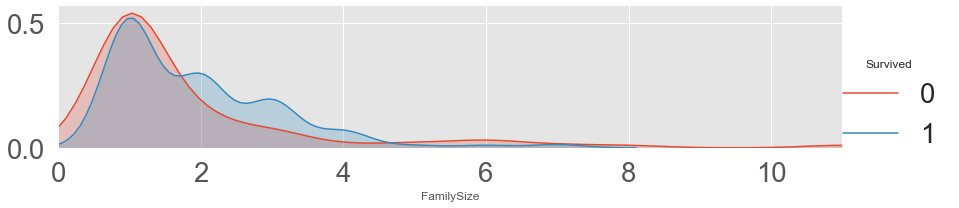

In [67]:
# 혼자 탔을경우 상당히 많이 죽었음
# 반면 가족이 한명이라도 있을경우 사망률이 많이 줄어들었다는 것을 확인
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [68]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [69]:
dataset['FamilySize'].head()

0    0.0
1    0.4
2    0.0
3    0.0
4    0.8
Name: FamilySize, dtype: float64

In [70]:
# 불필요한 Ticket 데이터와 SibSp와 Parch는 필요한 정보 제거

features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [71]:
test = test.drop(['PassengerId'], axis=1)
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0.0,0.0
1,3,1,3.0,0.0,2.0,0,2.0,0.4
2,2,0,3.0,0.0,2.0,2,0.0,0.0
3,3,0,2.0,0.0,2.0,0,0.0,0.0
4,3,1,1.0,0.0,2.0,0,2.0,0.8


In [72]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [73]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [75]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [76]:
model = RandomForestClassifier()
model.fit(train_data, target)

RandomForestClassifier()

In [78]:
test['Title'] = test['Title'].fillna(0)
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0.0,0.0
1,3,1,3.0,0.0,2.0,0,2.0,0.4
2,2,0,3.0,0.0,2.0,2,0.0,0.0
3,3,0,2.0,0.0,2.0,0,0.0,0.0
4,3,1,1.0,0.0,2.0,0,2.0,0.8
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0.0,0.0
414,1,1,3.0,3.0,0.8,1,0.0,0.0
415,3,0,3.0,0.0,2.0,0,0.0,0.0
416,3,0,2.0,0.0,2.0,0,0.0,0.0


In [79]:
prediction = model.predict(test)

In [80]:
accuracy = round(model.score(train_data, target) * 100, 2)
print("Accuracy : ", accuracy, "%")

Accuracy :  90.01 %


In [81]:
test2 = pd.read_csv('titanic/test.csv')

In [82]:
submission = pd.DataFrame(
    {
        "PassengerId":test2["PassengerId"],
        "Survived":prediction
    }
)
submission.to_csv('submission_rf_200107.csv', index=False)